In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("E:\Work\College_works\Assignments\ML\ML_Coursework\Disease_Prediction\Data\\blood_samples_dataset_test.csv") 
display(df.head())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
convertedData = df.copy()  
convertedData['Disease']= le.fit_transform(df['Disease'].astype(str))
display(convertedData.head())

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,4
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,3
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,3


In [3]:
display(df.isnull().sum())

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [4]:
X = convertedData.drop(columns=["Disease"])
Y = convertedData["Disease"]
display(X,Y)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.970168,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.517805,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.521000,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.944932,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.082744,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


0      4
1      1
2      3
3      1
4      3
      ..
481    1
482    3
483    0
484    1
485    1
Name: Disease, Length: 486, dtype: int64

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
display(x_train,x_test,y_train,y_test)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
99,0.417091,0.099784,0.750205,0.607304,0.012646,0.913683,0.903442,0.491406,0.214880,0.678122,...,0.809520,0.403660,0.010965,0.407037,0.385724,0.050595,0.571697,0.652910,0.330147,0.765629
37,0.432907,0.643493,0.004819,0.659833,0.571920,0.691802,0.554266,0.030607,0.921350,0.560548,...,0.924727,0.399181,0.220242,0.839298,0.480568,0.367970,0.330943,0.949223,0.505525,0.738225
472,0.114095,0.635890,0.203636,0.056433,0.392786,0.142088,0.104027,0.828781,0.217090,0.779530,...,0.921349,0.927771,0.953943,0.018708,0.617343,0.172391,0.414155,0.531972,0.918571,0.786312
423,0.259873,0.465692,0.500218,0.171879,0.604475,0.598976,0.100062,0.597615,0.759951,0.351140,...,0.426481,0.550448,0.541656,0.893428,0.299422,0.827337,0.714478,0.331666,0.027148,0.443208
405,0.800011,0.978342,0.479261,0.715013,0.225745,0.888415,0.778630,0.207196,0.485781,0.728159,...,0.126704,0.545789,0.163587,0.614262,0.710935,0.924767,0.564080,0.691246,0.117243,0.513505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.153240,0.547302,0.072281,0.848989,0.340108,0.240870,0.866219,0.211416,0.012020,0.266550,...,0.721607,0.318417,0.508038,0.202719,0.057361,0.217296,0.512029,0.475096,0.809907,0.718676
21,0.124924,0.326425,0.045912,0.558513,0.870439,0.746222,0.244098,0.375637,0.909500,0.055686,...,0.623388,0.346910,0.628164,0.979580,0.962818,0.136194,0.187921,0.090302,0.790343,0.035086
468,0.301679,0.452203,0.546927,0.114903,0.953589,0.277721,0.036051,0.686138,0.169631,0.472965,...,0.638914,0.359496,0.827243,0.519253,0.819174,0.266991,0.596195,0.181915,0.692579,0.397668
433,0.304112,0.822556,0.164456,0.559591,0.380353,0.230402,0.871511,0.474086,0.760189,0.623927,...,0.568049,0.195445,0.670108,0.583691,0.343748,0.148846,0.926234,0.817760,0.724867,0.193836


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
210,0.643664,0.502379,0.324245,0.113346,0.942936,0.771205,0.921699,0.114555,0.885984,0.969441,...,0.677104,0.814770,0.495789,0.234634,0.339795,0.083328,0.482789,0.351902,0.565870,0.694178
419,0.305976,0.827179,0.207723,0.447533,0.488303,0.536328,0.955581,0.781439,0.728232,0.202374,...,0.261919,0.045647,0.769128,0.054193,0.517650,0.320057,0.054492,0.723504,0.169387,0.808749
14,0.098346,0.680454,0.174160,0.136738,0.309211,0.608134,0.859290,0.335315,0.893824,0.600752,...,0.552285,0.504078,0.972048,0.132895,0.278157,0.344174,0.745458,0.481018,0.154288,0.905624
201,0.942709,0.303635,0.460428,0.627237,0.432830,0.323165,0.038134,0.523088,0.675243,0.201712,...,0.425500,0.214593,0.964455,0.123561,0.867640,0.068637,0.764249,0.555501,0.956695,0.243914
97,0.274984,0.035757,0.977251,0.496936,0.021902,0.445690,0.169856,0.005770,0.565912,0.757325,...,0.074372,0.760030,0.939451,0.426831,0.342091,0.621070,0.985761,0.629741,0.314137,0.378351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,0.588391,0.003088,0.773188,0.854583,0.498644,0.565886,0.473069,0.508935,0.062029,0.864294,...,0.381265,0.508146,0.616156,0.101654,0.147040,0.115004,0.098292,0.526956,0.251893,0.114850
245,0.044408,0.779703,0.898043,0.005261,0.438249,0.640444,0.385490,0.166026,0.919896,0.993077,...,0.990592,0.434038,0.490554,0.270386,0.797894,0.521187,0.196440,0.916255,0.036797,0.775807
359,0.339849,0.219150,0.253462,0.945664,0.369674,0.052252,0.736514,0.256699,0.480099,0.363876,...,0.675698,0.458479,0.073685,0.169003,0.067993,0.781198,0.933021,0.419578,0.299592,0.809380
162,0.989638,0.242008,0.015499,0.825183,0.168211,0.827699,0.393668,0.795229,0.949492,0.694070,...,0.615567,0.562692,0.364247,0.523155,0.545378,0.067201,0.663639,0.375272,0.727693,0.584580


99     1
37     1
472    0
423    0
405    1
      ..
315    1
21     4
468    0
433    1
346    1
Name: Disease, Length: 388, dtype: int64

210    1
419    1
14     1
201    1
97     0
      ..
25     4
245    4
359    0
162    1
230    1
Name: Disease, Length: 98, dtype: int64

In [6]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [7]:
nb_preds = nb.predict(x_test)
display(nb_preds)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 3, 1, 1,
       1, 1, 1, 5, 1, 4, 1, 1, 4, 1, 1, 4, 1, 0, 0, 1, 0, 1, 1, 1, 4, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
print(classification_report(y_test,nb_preds,zero_division=0))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50        14
           1       0.76      0.95      0.85        64
           2       0.00      0.00      0.00         2
           3       0.50      0.10      0.17        10
           4       0.60      0.43      0.50         7
           5       1.00      1.00      1.00         1

    accuracy                           0.73        98
   macro avg       0.58      0.49      0.50        98
weighted avg       0.69      0.73      0.69        98



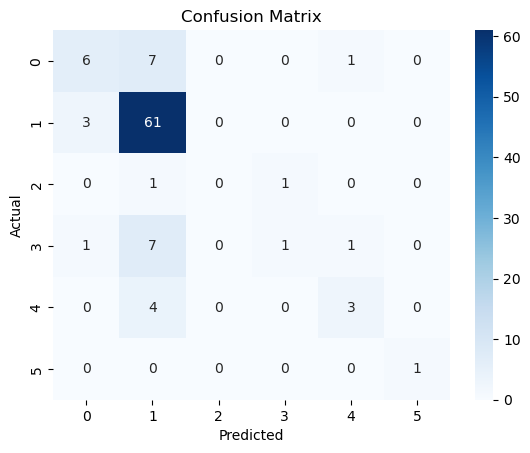

In [9]:
sns.heatmap(confusion_matrix(y_test,nb_preds), annot=True, fmt="d", cmap="Blues",
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [10]:
corr = convertedData.corr()
corr.style.background_gradient(cmap='coolwarm')

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
Glucose,1.000000,0.041716,-0.033918,-0.044161,0.014082,0.099692,0.017898,-0.021956,0.115377,0.020463,-0.051997,0.057148,0.053395,0.017041,-0.026571,0.059606,-0.038671,-0.003912,0.008495,0.055358,0.042778,0.034157,0.030084,-0.057289,-0.131351
Cholesterol,0.041716,1.000000,-0.082814,-0.018645,-0.037447,0.089261,0.070890,0.003759,0.078588,0.101201,-0.047341,-0.038441,-0.019163,0.062282,-0.050572,-0.014955,-0.039932,0.013919,0.006140,0.081820,0.031888,0.007317,-0.019628,0.000469,-0.032747
Hemoglobin,-0.033918,-0.082814,1.000000,-0.071351,-0.053571,-0.043260,-0.060376,0.020023,-0.014829,-0.014435,0.043210,-0.039921,-0.022898,-0.023256,-0.025783,-0.031939,-0.027649,0.020690,0.055712,-0.037836,-0.065433,0.029496,0.010196,-0.038146,-0.041784
Platelets,-0.044161,-0.018645,-0.071351,1.000000,0.006125,-0.071980,0.019951,0.029870,0.023604,-0.027918,-0.006257,0.132941,-0.059136,0.067048,0.010490,0.020551,0.026365,0.036883,-0.031587,-0.009001,-0.018892,0.003540,0.006910,-0.032405,-0.102648
White Blood Cells,0.014082,-0.037447,-0.053571,0.006125,1.000000,0.089398,0.027318,0.050894,-0.009425,-0.015990,-0.077885,0.010977,-0.027616,0.005510,-0.014424,-0.084988,0.029464,-0.031254,-0.025951,0.017316,0.009744,-0.149898,-0.050551,-0.075215,0.241368
Red Blood Cells,0.099692,0.089261,-0.043260,-0.071980,0.089398,1.000000,0.030484,-0.006270,-0.063587,-0.002481,0.005705,-0.080650,-0.060273,-0.018568,0.010618,-0.011538,-0.028023,0.042918,0.035138,-0.004586,0.056263,-0.031191,-0.043829,0.017739,0.254369
Hematocrit,0.017898,0.070890,-0.060376,0.019951,0.027318,0.030484,1.000000,0.014085,-0.012708,-0.007661,-0.050393,0.035657,-0.075840,-0.024565,0.021707,-0.037721,0.046428,-0.003095,0.015224,-0.002026,-0.060802,0.028159,-0.053756,0.013921,0.179136
Mean Corpuscular Volume,-0.021956,0.003759,0.020023,0.029870,0.050894,-0.006270,0.014085,1.000000,0.056634,0.097303,0.023160,-0.020803,0.045616,-0.051330,0.070058,0.040009,0.022514,0.042710,-0.005969,-0.037105,-0.068362,-0.038353,0.066936,0.054672,0.024293
Mean Corpuscular Hemoglobin,0.115377,0.078588,-0.014829,0.023604,-0.009425,-0.063587,-0.012708,0.056634,1.000000,0.053716,-0.066917,0.018533,0.026032,0.034992,0.017746,0.007591,-0.052265,-0.037074,0.006245,-0.023613,-0.083603,-0.036914,0.142494,-0.127203,-0.106686
Mean Corpuscular Hemoglobin Concentration,0.020463,0.101201,-0.014435,-0.027918,-0.015990,-0.002481,-0.007661,0.097303,0.053716,1.000000,-0.085051,0.007691,0.051672,-0.064274,-0.055663,0.023053,0.022143,-0.027161,-0.076798,0.032895,0.036256,-0.013566,0.005117,0.038146,-0.012350


In [11]:
mse = mean_squared_error(y_test,nb_preds)
r2Score = r2_score(y_test,nb_preds)
print("MSE : ",mse,"\nR2 Score : ",r2Score,"\nAccuracy:", accuracy_score(y_test, nb_preds))

MSE :  1.0408163265306123 
R2 Score :  0.17667407956510994 
Accuracy: 0.7346938775510204


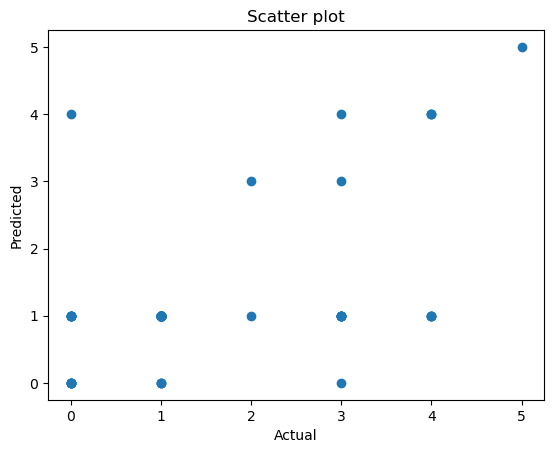

In [12]:
plt.scatter(y_test,nb_preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter plot")
plt.show()